In [38]:
import nilearn.plotting as plotting
import nilearn.image as img
from nilearn.reporting import get_clusters_table
import glob
from decouple import config
import matplotlib.pyplot as plt
import os
import pandas as pd

In [26]:
path = os.path.join(config('happy'), '2ndlevel', '1sampleT')
imgs = glob.glob(f'{path}/*.nii.gz')
pvals = img.load_img([images for images in imgs if '_tfce_corrp_tstat1' in images][0])
t_stat = img.load_img([images for images in imgs if '_tstat1' in images][0])
mask = img.load_img([images for images in imgs if 'mask_img' in images][0])

Plotting pvalues

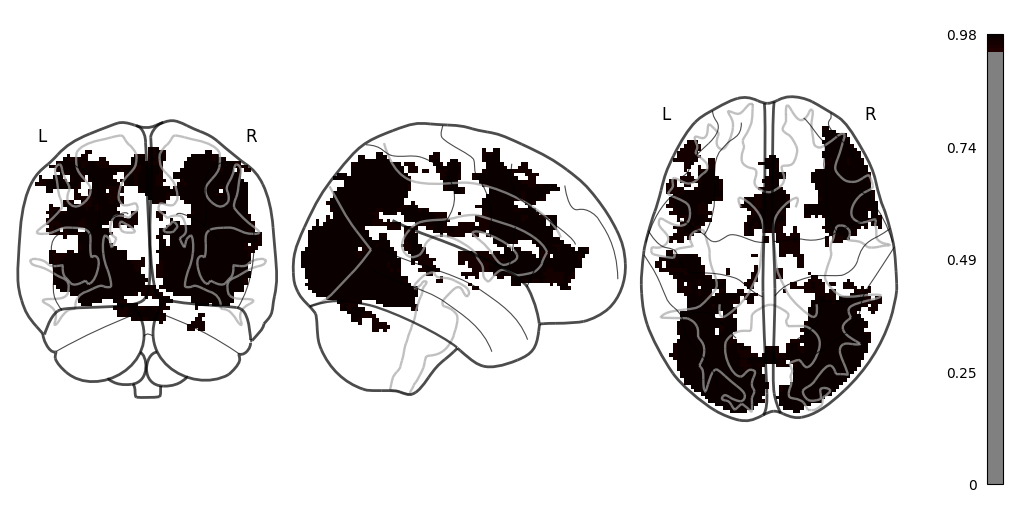

In [23]:
fig = plt.figure(figsize=(10, 5))
plotting.plot_glass_brain(pvals, colorbar=True, plot_abs=False,figure=fig, vmin=0.95, threshold=0.95)

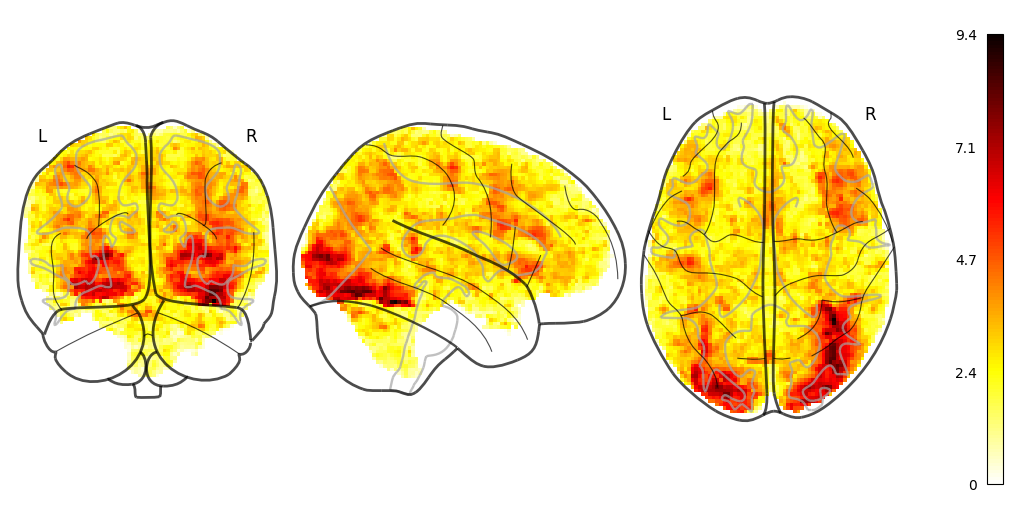

In [33]:
fig = plt.figure(figsize=(10, 5))
plotting.plot_glass_brain(t_stat, colorbar=True, plot_abs=True, figure=fig )
plt.show()

In [40]:
pval_table = get_clusters_table(pvals, stat_threshold=0.95,
                           cluster_threshold=10.0).set_index('Cluster ID', drop=True)
pval_table['Pval'] = 1 - pval_table['Peak Stat'] 
pval_table = pval_table.drop(columns='Peak Stat')

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(


In [42]:
tval_results = get_clusters_table(t_stat, stat_threshold=0.95,
                           cluster_threshold=10.0).set_index('Cluster ID', drop=True)

In [43]:
res_table = pd.merge(pval_table, tval_results, how='left', left_on=['X', 'Y', 'Z'], right_on=['X', 'Y', 'Z'])